In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib
import pickle
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA

sns.set(font_scale=1.5, context=c)

# Load data
<br>

In [39]:
# Load gate vector data
with open('output/' + 'test' + '.pkl', 'rb') as f:
        input = pickle.load(f)

In [40]:
# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

In [41]:
print(parameter_dict)

{'num_batches': 200, 'tensor_size': 20, 'batch_size': 100, 'M': 10, 'gamma': 2, 'L': 3, 'output_file': 'test', 'learning_rate': 0.001}


In [42]:
print(labels)

[3 4 5 1 2 0 4 3 8 7 6 7 8 7 4 8 8 2 8 9 2 7 0 5 0 5 7 1 3 2 6 6 3 3 3 6 1
 6 2 0 3 2 1 8 9 1 9 6 4 1 4 0 1 4 1 3 4 1 7 6 7 1 7 9 1 0 5 1 6 2 7 3 8 4
 8 5 6 6 3 7 5 8 0 9 5 0 4 1 2 2 6 3 0 4 3 7 5 8 6 9 4 0 6 1 6 2 3 3 6 4 7
 5 1 6 4 7 3 8 1 9 8 7 2 7 1 7 7 3 7 1 7 8 8 7 9 6 2 0 2 2 7 6 6 8 5 3 8 2
 2 8 2 1 0 1 4 7 2 2 5 0 7 7 4 1 3 6 0 0 9 4 4 6 3 4 3 4 4 5 5 8 4 0 4 6 4
 2 8 3 4 1 5 3 5 6 4 8 1 4 5 0 7 7 1 5 6 8 0 8 3 3 3 7 9 8 0 9 9 2 4 6 2 2
 3 5 9 3 6 1 8 7 1 3 8 9 4 1 8 9 2 9 5 6 7 0 1 3 2 9 9 2 8 8 0 1 8 4 8 3 9
 5 4 2 8 9 1 2 3 9 1 1 6 6 2 5 1 8 8 9 0 4 9 2 3 5 3 0 7 1 4 2 0 3 4 4 2 5
 3 6 9 7 7 8 1 9 0 0 6 1 7 2 1 3 0 4 7 5 6 6 2 7 8 8 1 9 1 0 8 1 3 2 5 3 2
 4 4 5 1 6 6 7 6 8 5 9 0 6 3 4 7 2 7 6 1 4 1 7 5 5 6 5 8 4 8 7 1 8 0 9 6 2
 7 9 9 3 6 9 9 3 4 8 4 2 4 0 5 9 0 8 8 0 0 5 7 6 1 0 4 1 3 0 8 4 5 2 9 6 2
 5 0 3 4 5 2 3 1 8 1 3 8 4 0 1 6 5 6 3 7 0 1 8 6 3 9 0 1 6 1 2 4 7 5 1 2 1
 7 8 9 1 1 7 1 1 7 3 3 8 0 5 7 2 0 0 6 9 8 7 5 6 5 7 4 4 9 1 1 6 2 8 9 4 3
 7 8 5 4 1 8 2 4 6 4 7 2 

In [43]:
print(gates.shape)

(1000, 3, 10)


# Visualize gates and images
<br>

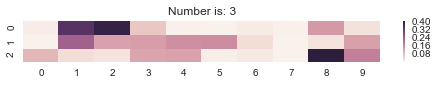

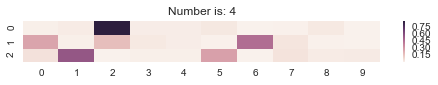

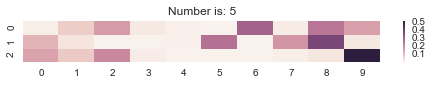

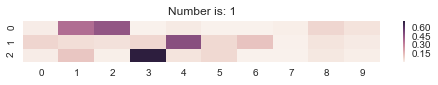

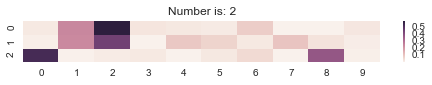

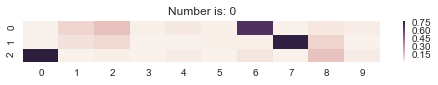

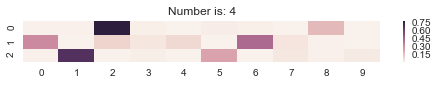

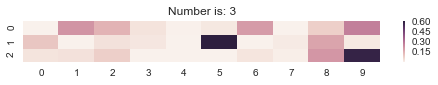

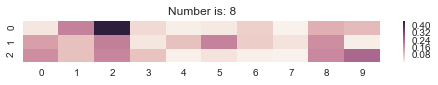

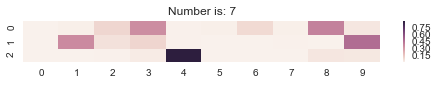

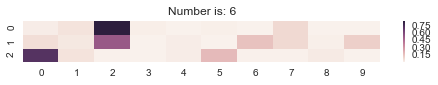

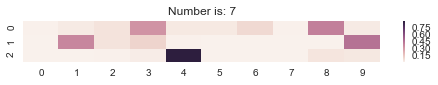

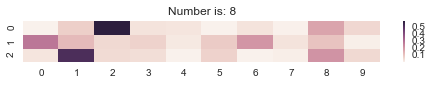

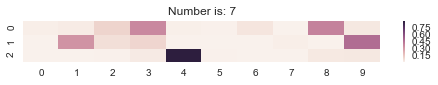

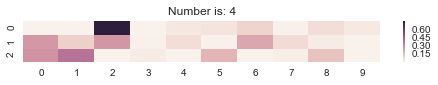

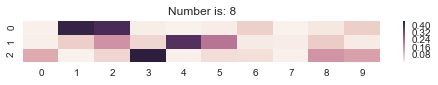

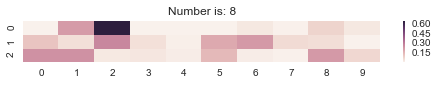

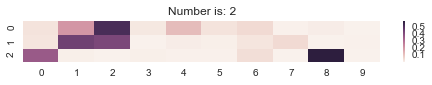

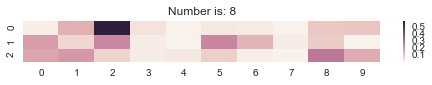

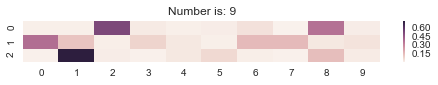

In [44]:
matplotlib.rcParams['figure.figsize'] = 10,10
num_test_digits = 20

plot_num = num_test_digits * 100 + 11
for i in range(num_test_digits):
    # To shuffle
    k = i + np.random.randint(low=-i, high=gates.shape[0]-1-i)

    plt.figure(figsize = (8, 0.75))
    plt.title('Number is: '+str(labels[i]))
    sns.heatmap(gates[i,:,:])


In [45]:
# Compute cosine similarity
gate_vectors = np.reshape(gates, (-1, parameter_dict['L']*parameter_dict['M']))
print(gate_vectors.shape)
gate_vectors = np.transpose(gate_vectors)

trial = 2
output = np.zeros(num_test_digits)
for i in range(num_test_digits):
    a = gate_vectors[:, trial]
    b = gate_vectors[:, i]
    an = a/np.linalg.norm(a)
    bn = b/np.linalg.norm(b)
    output[i] = np.dot(an,bn)

print(output)
elems = np.argsort(output)
print(elems[::-1])

(1000, 30)
[ 0.43032812  0.25010802  1.          0.21330097  0.31956895  0.47718992
  0.27281039  0.8185119   0.724984    0.18015237  0.2634243   0.17655886
  0.43753373  0.17425266  0.33620066  0.40147703  0.4278248   0.22806523
  0.54347497  0.37449058]
[ 2  7  8 18  5 12  0 16 15 19 14  4  6 10  1 17  3  9 11 13]


In [46]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

## t-SNE of the gates
<br>

In [47]:
gates_reshaped = np.reshape(gates, [gates.shape[0], -1])
print(gates_reshaped.shape) # sanity check
independent_labels = list(set(labels))
print(independent_labels) # sanity check

# TSNE Vis
model_TSNE = TSNE(verbose=100)
# PCA Vis
model_PCA = PCA()

x = model_TSNE.fit_transform(gates_reshaped)
y = labels

(1000, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.110849
[t-SNE] Iteration 25: error = 1.0303811, gradient norm = 0.0107982
[t-SNE] Iteration 50: error = 0.9898863, gradient norm = 0.0141841
[t-SNE] Iteration 75: error = 0.6300602, gradient norm = 0.0028078
[t-SNE] Iteration 100: error = 0.6192855, gradient norm = 0.0072282
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.619285
[t-SNE] Iteration 125: error = 0.5447660, gradient norm = 0.0008706
[t-SNE] Iteration 125: gradient norm 0.000871. Finished.
[t-SNE] Error after 125 iterations: 0.619285


(211, 30)
(107, 30)
(104, 30)
107
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 211 / 211
[t-SNE] Mean sigma: 0.122809
[t-SNE] Iteration 25: error = 0.6732037, gradient norm = 0.0229577
[t-SNE] Iteration 50: error = 1.3688356, gradient norm = 0.0324155
[t-SNE] Iteration 75: error = 2.4862702, gradient norm = 0.0509645
[t-SNE] Iteration 100: error = 2.5146201, gradient norm = 0.0018950
[t-SNE] KL divergence after 100 iterations with early exaggeration: 2.514620
[t-SNE] Iteration 125: error = 2.4264042, gradient norm = 0.0010525
[t-SNE] Iteration 150: error = 2.4010444, gradient norm = 0.0009979
[t-SNE] Iteration 150: gradient norm 0.000998. Finished.
[t-SNE] Error after 150 iterations: 2.514620


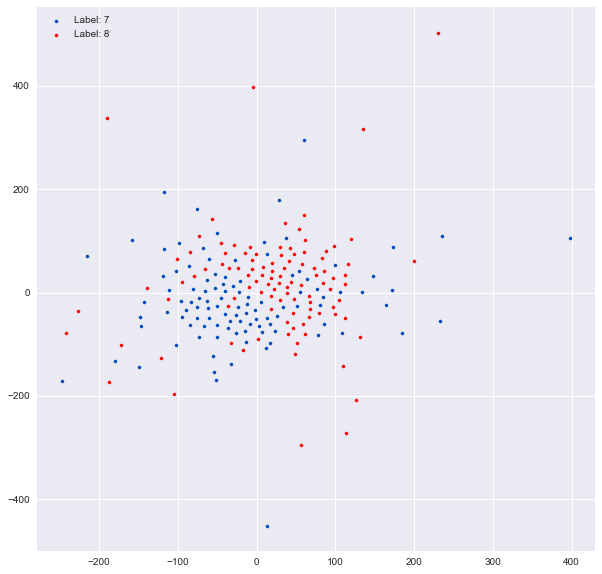

In [48]:

# Comparing 7 and 8
mask7 = y == 7
mask8 = y == 8
reshaped7 = gates_reshaped[mask7]
sevs = len(reshaped7) # number of sevens (used below for scatterplot)
reshaped8 = gates_reshaped[mask8]
r78 = np.concatenate((reshaped7, reshaped8), axis=0)

print(r78.shape)
print(reshaped7.shape)
print(reshaped8.shape)
print(sevs)

x78 = model_TSNE.fit_transform(r78)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x78[:sevs,0], x78[:sevs,1], s=10, c='#0048BA', label='Label: 7')
ax1.scatter(x78[sevs:,0], x78[sevs:,1], s=10, c='r', label='Label: 8')
plt.legend(loc='upper left');
plt.show()

# Plot t-SNE

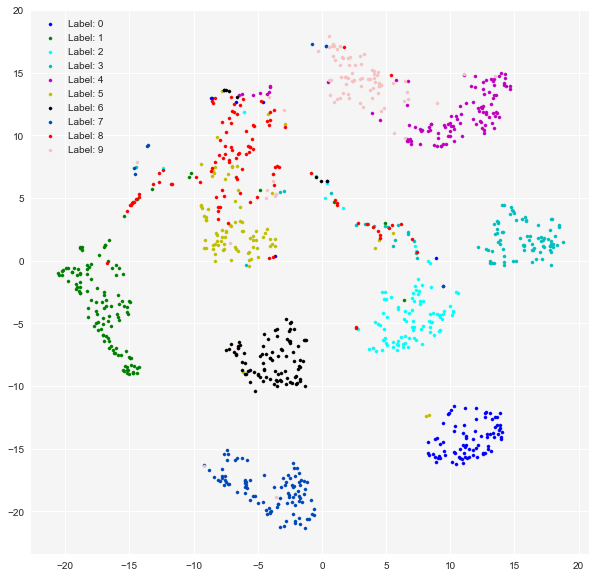

In [49]:
plt.rcParams['axes.facecolor'] = '#f5f5f5f5'

# Add more colors if doing something other than MNIST
colors = ['b','g','#00FFFF','c','m','y','k','#0048BA','r','#F4C2C2']

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in (independent_labels):
    mask_i = y == i
    x_i = x[mask_i]
    ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
plt.legend(loc='upper left');
plt.show()

# Plot PCA

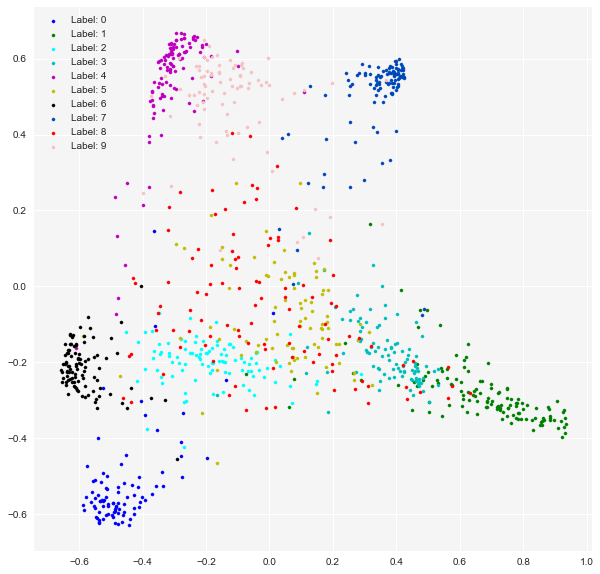

In [50]:
model_PCA = PCA()
x2 = model_PCA.fit_transform(gates_reshaped)

plt.rcParams['axes.facecolor'] = '#f5f5f5f5'

# Add more colors if doing something other than MNIST
colors = ['b','g','#00FFFF','c','m','y','k','#0048BA','r','#F4C2C2']

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in (independent_labels):
    mask_i = y == i
    x_i = x2[mask_i]
    ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
plt.legend(loc='upper left');
plt.show()